In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
csv_path1 = "Housepy_raw.csv"
csv_path2 = "TopSchools.csv"

housepy_df = pd.read_csv(csv_path1)
topschool = pd.read_csv(csv_path2)

In [4]:
housepy_df.head()

,MLS Number,Street Number,Street Name,City/Location,Zip Code,List Price,Close Price,Close Date,Area,Subdivision,...,Price Sq Ft Sold,Lot Size,Year Built,Bedrooms,Baths Total,New Construction,Pool Private,No Of Garage Cap,Style,CDOM
0,85605507,823,Loper,Houston,77017,44500,44500,42219,3.0,Oak Meadows Sec 01,...,35.83,6600.0,1950.0,3,1.0,False,False,2,Traditional,81
1,67891056,9009,Freeland,Houston,77075,65000,60000,42219,3.0,Easthaven,...,45.87,7500.0,1977.0,3,2.0,False,False,0,Traditional,19
2,97810747,17503,Waverly Grove,Houston,77084,90000,78500,42219,8.0,Ashley Grove,...,94.69,3900.0,1984.0,2,1.0,False,False,1,Traditional,70
3,94468427,6619,Briar Glade,Houston,77072,85900,85000,42219,28.0,Brays Village East Sec 02,...,46.60,4050.0,1980.0,3,2.0,False,False,2,Traditional,40
4,19671424,546,Glenvale,Houston,77060,105000,94000,42219,12.0,Colonial Hills,...,86.32,6090.0,1968.0,3,1.1,False,False,1,Traditional,98


In [5]:
subset = housepy_df[['School Elementary','School Middle','School High']]

In [6]:
#Does high school zoning impact price? SCHOOL DIST vs Outside data (one person beast)
len(subset)

91815

In [7]:
subset.dtypes

School Elementary    object
School Middle        object
School High          object
dtype: object

In [8]:
#Does high school zoning impact price? SCHOOL DIST vs Outside data (one person beast)

## Zipcode Analysis

In [9]:
groupby_school = housepy_df.groupby(['School District'])

In [10]:
df_SchoolDistrict = pd.DataFrame(groupby_school.sum())

In [11]:
print(df_SchoolDistrict.head())

                          MLS Number    Zip Code  List Price  Close Price  \
School District                                                             
1 - Aldine              210226965928   322461590   613422258    597350592   
11 - Conroe                 53076969      231060     1318990      1314765   
13 - Cypress-Fairbanks  740198129672  1115971226  3210190620   3139626177   
19 - Fort Bend             891208552     1464339     2942801      2819351   
2 - Alief               214258879527   322829718   916326073    886895654   

                        Close Date      Area  Sq Ft Total  Price Sq Ft Sold  \
School District                                                               
1 - Aldine               179820307   63651.0    7503307.0         340469.98   
11 - Conroe                 129522      19.0       7811.0            508.96   
13 - Cypress-Fairbanks   621936695  143982.0   33849991.0        1347749.12   
19 - Fort Bend              813348     679.0      34963.0        

In [12]:
df_schoolbyprice = df_SchoolDistrict['List Price']

In [13]:
df_schoolbyprice.head()

School District
1 - Aldine                 613422258
11 - Conroe                  1318990
13 - Cypress-Fairbanks    3210190620
19 - Fort Bend               2942801
2 - Alief                  916326073
Name: List Price, dtype: int64

In [14]:
df_rand1 = df_schoolbyprice.sample(8)

In [15]:
print(df_rand1)

School District
41 - Pasadena              490608073
29 - Humble               1019082411
23 - Goose Creek              239999
99 - Other                   2179600
53 - Tomball                28033525
13 - Cypress-Fairbanks    3210190620
1 - Aldine                 613422258
26 - Hitchcock                140000
Name: List Price, dtype: int64


In [16]:
df_rand2 = df_schoolbyprice.sample(8)

In [17]:
print(df_rand2)

School District
49 - Spring Branch    5003487452
21 - Galena Park       192985367
19 - Fort Bend           2942801
1 - Aldine             613422258
28 - Huffman            20306544
8 - Channelview         77778167
9 - Clear Creek        955153904
2 - Alief              916326073
Name: List Price, dtype: int64


In [18]:
df_rand3 = df_schoolbyprice.sample(8)

In [19]:
print(df_rand3)

School District
26 - Hitchcock                140000
19 - Fort Bend               2942801
33 - Lamar Consolidated       485319
46 - Sheldon               269840943
8 - Channelview             77778167
28 - Huffman                20306544
2 - Alief                  916326073
21 - Galena Park           192985367
Name: List Price, dtype: int64


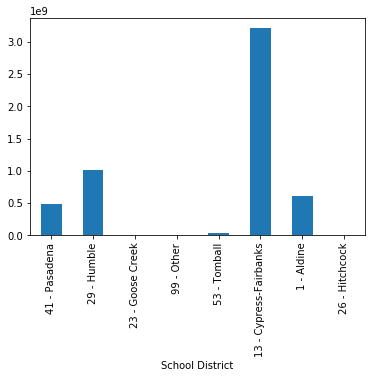

In [20]:
df_rand1_plot = df_rand1.plot(kind='bar')

df_rand1 = df_schoolbyprice.sort(columns='school',ascending=False).plot(kind='bar',legend=None,title="School Zoning vs Close Price")
df_rand1.set_xlabel("School")
my_plot.set_ylabel("ClosePrice ($)")

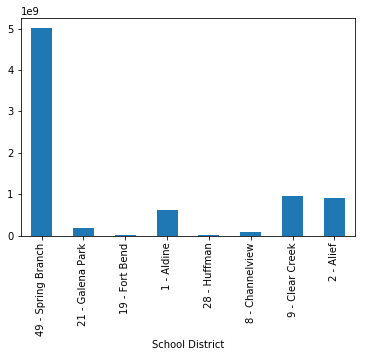

In [21]:
df_rand2_plot = df_rand2.plot(kind='bar')

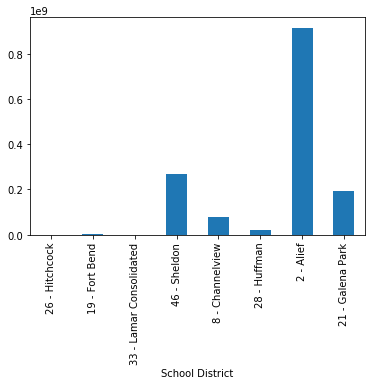

In [22]:
df_rand3_plot = df_rand3.plot(kind='bar')

In [23]:
df_ranschool = df_schoolbyprice[["29 - Humble", "27 - Houston", "49 - Spring Branch", "30 - Katy"]]

In [24]:
df_ranschool.head()

School District
29 - Humble            1019082411
27 - Houston          18795085674
49 - Spring Branch     5003487452
30 - Katy               743890938
Name: List Price, dtype: int64

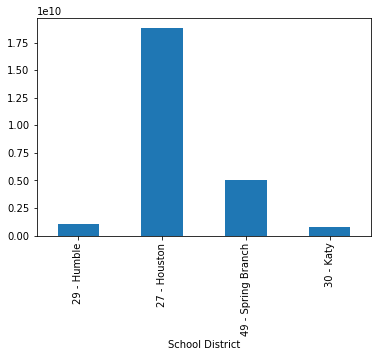

In [25]:
df_randtotal_plot = df_ranschool.plot(kind='bar')

In [26]:
topschool.head()

,School Elementary,Rating,Numerical Value,School Middle,Rating.1,Numerical Value.1,School High,Rating.2,Numerical Value.2
0,CANYON POINT ELEMENTARY SCHOOL,A+,100,SPILLANE MIDDLE SCHOOL,A,95,MEMORIAL HIGH SCHOOL (SPRING BRANCH),A+,100
1,HAMILTON ELEMENTARY SCHOOL,A,95,WILLOW WOOD JUNIOR HIGH,A,95,CYPRESS WOOD HIGH SCHOOL,A+,100
2,RENNELL ELEMENTARY SCHOOL,A,95,GOODSON MIDDLE SCHOOL,A,95,CYPRESS RANCHHIGH SCHOOL,A+,100
3,FRANCONE ELEMENTARY SCHOOL,B,85,RIVERWOOD MIDDLE SCHOOL,A,95,KINGWOOD HIGH SCHOOL,A+,100
4,HOLMSLEY ELEMENTARY SCHOOL,B,85,HUMBLE MILDDE SCHOOL,B-,80,TOMBALL MEMORIAL H S,A+,100


In [27]:
df_Elementary_rating = topschool[["School Elementary", "Rating", "Numerical Value"]]

In [28]:
df_Middle_rating = topschool[["School Middle", "Rating.1", "Numerical Value.1"]]

In [29]:
df_High_rating = topschool[["School High", "Rating.2","Numerical Value.2"]]

In [30]:
df_Elementary_School_D_join = pd.merge(df_Elementary_rating, housepy_df,on="School Elementary")

In [31]:
df_Middle_School_D_join = pd.merge(df_Middle_rating, housepy_df,on="School Middle")

In [32]:
df_High_School_D_join = pd.merge(df_High_rating, housepy_df,on="School High")

In [33]:
_Barchart1 = df_Middle_School_D_join
_Barchart1[['School District','Numerical Value.1']]

,School District,Numerical Value.1
0,13 - Cypress-Fairbanks,95
1,13 - Cypress-Fairbanks,95
2,13 - Cypress-Fairbanks,95
3,13 - Cypress-Fairbanks,95
4,13 - Cypress-Fairbanks,95
5,13 - Cypress-Fairbanks,95
6,13 - Cypress-Fairbanks,95
7,13 - Cypress-Fairbanks,95
8,13 - Cypress-Fairbanks,95
9,13 - Cypress-Fairbanks,95


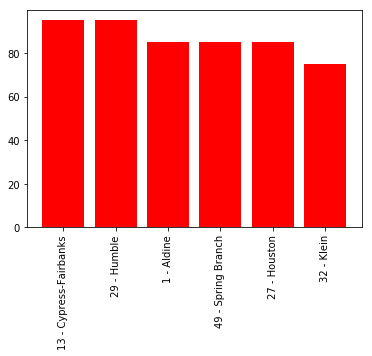

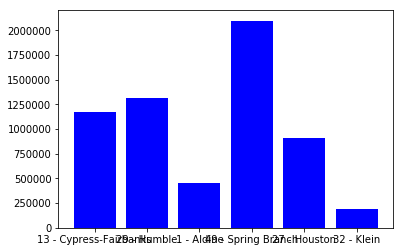

In [34]:
plt.xticks(rotation='vertical')
plt.bar(_Barchart1['School District'], _Barchart1['Numerical Value.1'], color='r')
plt.show()
plt.bar(_Barchart1['School District'], _Barchart1['Close Price'], color='b')
plt.show()
#plt.bar(_Barchart1['School District'], _Barchart1['Close Price'])
#plt.xticks(x, label, rotation='vertical')

C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Close Price')

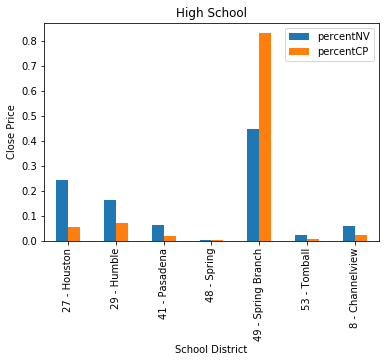

In [35]:
_Barchart2 = df_High_School_D_join[['School District','Numerical Value.2', 'Close Price']]
_Barchart2['percentNV'] = _Barchart2['Numerical Value.2']/_Barchart2['Numerical Value.2'].sum()
_Barchart2['percentCP'] = _Barchart2['Close Price']/_Barchart2['Close Price'].sum()
_Barchart2 = _Barchart2.groupby(_Barchart2['School District']).sum()
_Barchart2 = _Barchart2[['percentNV','percentCP']]
_Barchart2.plot.bar()
plt.title("High School")
plt.ylabel("Close Price")


C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Close Price')

<Figure size 864x720 with 0 Axes>

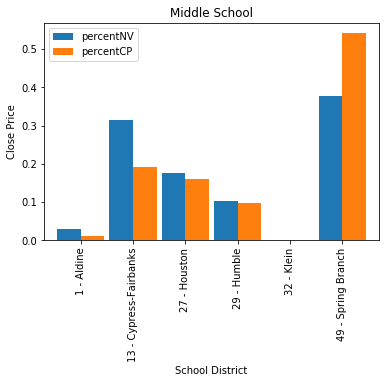

In [41]:
_Barchart1 = df_Middle_School_D_join [['School District','Numerical Value.1', 'Close Price']]
_Barchart1['percentNV'] = _Barchart1['Numerical Value.1']/_Barchart1['Numerical Value.1'].sum()
_Barchart1['percentCP'] = _Barchart1['Close Price']/_Barchart1['Close Price'].sum()
_Barchart1 = _Barchart1.groupby(_Barchart1['School District']).sum()
_Barchart1 = _Barchart1[['percentNV','percentCP']]

fig = plt.figure(figsize=(12, 10))
#fig.set_size_inches(18.5, 10.5, forward=True)
#plt.tight_layout()
#mng = plt.get_current_fig_manager()
#mng.frame.Maximize(True)

#plt.bar (x= ['School District'], y=(_Barchart1['Numerical Value.1']))

_Barchart1.plot.bar(width=0.9)
plt.title("Middle School")
plt.ylabel("Close Price")


In [42]:
_Barchart = df_Elementary_School_D_join
_Barchart [['School District','Numerical Value']]

,School District,Numerical Value
0,1 - Aldine,75
1,1 - Aldine,75
2,1 - Aldine,75
3,1 - Aldine,75
4,1 - Aldine,75
5,1 - Aldine,75
6,1 - Aldine,75
7,27 - Houston,75
8,1 - Aldine,75
9,1 - Aldine,75


C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sanja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Close Price')

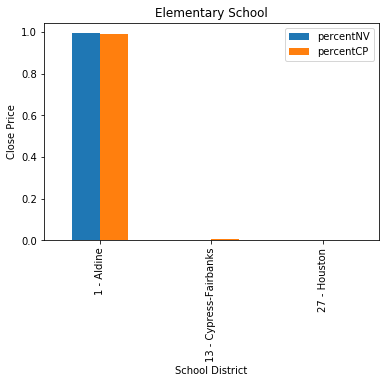

In [43]:
_Barchart = df_Elementary_School_D_join [['School District','Numerical Value', 'Close Price']]
_Barchart ['percentNV'] = _Barchart ['Numerical Value']/_Barchart ['Numerical Value'].sum()
_Barchart ['percentCP'] = _Barchart ['Close Price']/_Barchart ['Close Price'].sum()
_Barchart = _Barchart.groupby(_Barchart['School District']).sum()
_Barchart = _Barchart[['percentNV','percentCP']]
_Barchart.plot.bar()
plt.title("Elementary School")
plt.ylabel("Close Price")
